#### pandas data 호출

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [3]:
path = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/train.csv'
path2 = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/test.csv'
path3 = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/gender_submission.csv'
df = pd.read_csv(path)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_ = df.groupby(by=['Survived', 'Pclass'])
df2 = df_.size().unstack()

In [7]:
df2

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


- axes [0,0], [1, 1] 만 그림으로 채우기  
1) 그림 1 :  
2) 그림 2 :   

그림1) Pclass에 따른 생존여부
- matplotlib 사용
- kind = 'bar'
- xticklabel = ['Not survived', 'Survived'] ; ylabel = 'number of survived'
- title = 'Survived'
- rot = 0 

#### 과제 1 
figure 공간 생성

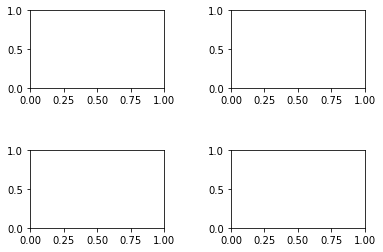

In [12]:
fig , axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.5, hspace=0.8)

In [13]:
axes[0][0]

In [14]:
df2.plot(ax = axes[0][0], kind = 'bar', rot = 0, title = 'Survived')
axes[0, 0].set_ylabel('Number of survived')
axes[0, 0].set_xlabel(None)
axes[0, 0].set_xticklabels(['Not survived', 'Survived'])

[Text(0.0, 0, 'Not survived'), Text(0.25, 0, 'Survived')]

그림2) PassengerId, Fare로 그래프 그리기
- title = 'Fare'
- x 축 : PassengerId ; y축 : Fare
- color : cyan
- 점선
- 주석달기 : fare의 값이 512인 곳에 text = 'richest' 

In [15]:
df.head()
df__ = df.pivot_table(index = 'PassengerId', values = 'Fare')

In [16]:
df__.sort_values(by = 'Fare', ascending=False)[:3]

,Fare
PassengerId,
259,512.3292
738,512.3292
680,512.3292


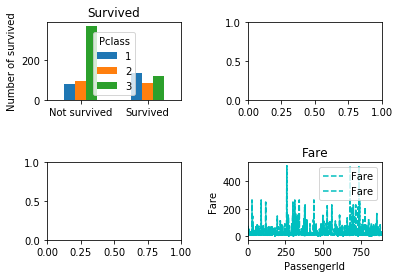

In [18]:
df__.plot(ax = axes[1, 1], title = 'Fare', style = 'c--')
axes[1, 1].set_xlabel('PassengerId')
axes[1, 1].set_ylabel('Fare')

fig

In [12]:
df__.index[258]

259

In [19]:
# 주석만들기
richest_data = [(df__.index[258], 'r'), (df__.index[737], 'r'), (df__.index[679], 'r')]

for idx, label in richest_data:
    axes[1, 1].annotate(label, xy=(idx, df__['Fare'].asof(idx) - 200), # xy : 표시할 위치. x : data, y: spx[data] +50, asof: 결측치 고려
                xytext=(idx, df__['Fare'].asof(idx) - 200), # xytext : text를 표시할 위치
                horizontalalignment='left', verticalalignment='top') # 글자의 끝 지점 설정.

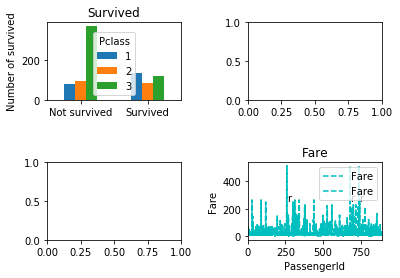

In [20]:
fig

In [212]:
plt.close('all')

- 그림 저장해서 인증하기